# Before you start :
   - These exercises are related to the Pivot table and correlation lessons.
   - Keep in mind that you need to use some of the functions you learned in the previous lessons.
   - All datasets are provided in the `your-code` folder of this lab.
   - Elaborate your codes and outputs as much as you can.
   - Try your best to answer the questions and complete the tasks and most importantly enjoy the process!!!

#### Import all the libraries that are necessary.

In [1]:
import pandas as pd
import numpy as np

# Challenge 1

#### Open the ` Employee.csv` file and name your dataset `employee`.

In [2]:
employee = pd.read_csv("C:/Users/Vladimir/Desktop/Ironhack_labs/Week13/lab-pivot-table-correlation/your_code/data/employee.csv")


In [33]:
employee

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30
3,Sonia,HR,Bachelor,F,analyst,4,35
4,Samuel,Sales,Master,M,associate,3,55
5,Eva,Sales,Bachelor,F,associate,2,55
6,Carlos,IT,Master,M,VP,8,70
7,Pedro,IT,Phd,M,associate,7,60
8,Ana,HR,Master,F,VP,8,70


#### What's the mean salary by department?
Hint : There are 2 ways to do it - one way is with groupby and the other way is with pivot tables. Do it both ways. 


In [6]:
# Method 1
employee.groupby("Department")['Salary'].mean().reset_index()


,Department,Salary
0,HR,45.00
1,IT,48.75
2,Sales,55.00


In [15]:
# Method 2
pivot_table = employee.pivot_table(index='Department', values='Salary', aggfunc='mean').reset_index()

pivot_table.columns = ['Department', 'Salary']
pivot_table.head()

,Department,Salary
0,HR,45.00
1,IT,48.75
2,Sales,55.00


#### We want now to group the data by more than one column. Use Pandas pivot table function to select the mean salary by department and title.

In [34]:
pivot_table = employee.pivot_table(index=['Department', 'Title'], values='Salary', aggfunc='mean').reset_index()
pivot_table




,Department,Title,Salary
0,HR,VP,70.0
1,HR,analyst,32.5
2,IT,VP,70.0
3,IT,analyst,32.5
4,IT,associate,60.0
5,Sales,associate,55.0


#### We want to display the number of years of work experience and the salary for each Title. Add Years as a column in your pivot table.
*Hint: Use Pandas doc(see References in README.md) to explore the pivot_table() arguments*

In [23]:
pivot_table = employee.pivot_table(index=['Title'], values=['Salary', 'Years'], aggfunc={'Salary': 'mean', 'Years': 'mean'}).reset_index()

pivot_table.columns = ['Title', 'Mean Salary', 'Mean Years']
pivot_table.head()

,Title,Mean Salary,Mean Years
0,VP,70.000000,8.00
1,analyst,32.500000,2.25
2,associate,56.666667,4.00


#### We want to know the information about the mean salary and number of employees in each department and for each job title.

In [37]:
pivot_table = employee.pivot_table(index = ['Department', 'Title'], values = ['Salary', 'Name'], aggfunc = {'Salary': 'mean', 'Name': 'count'}).reset_index()   

pivot_table

,Department,Title,Name,Salary
0,HR,VP,1,70.0
1,HR,analyst,2,32.5
2,IT,VP,1,70.0
3,IT,analyst,2,32.5
4,IT,associate,1,60.0
5,Sales,associate,2,55.0


#### We want to know for each department and for each job title the Salary's median, minimum, maximum and standard deviation. Comment your results.

In [47]:
pivot_table = employee.pivot_table(index = ['Department', 'Title'], values = 'Salary', aggfunc = {'Salary': ['median', 'min', 'max', 'std']}).reset_index()
pivot_table.columns = ['Deparment', 'Title', 'max_Salary', 'median_Salary', 'min_Salary', 'Standard Deviation']
pivot_table

,Deparment,Title,max_Salary,median_Salary,min_Salary,Standard Deviation
0,HR,VP,70,70.0,70,NaN
1,HR,analyst,35,32.5,30,3.535534
2,IT,VP,70,70.0,70,NaN
3,IT,analyst,35,32.5,30,3.535534
4,IT,associate,60,60.0,60,NaN
5,Sales,associate,55,55.0,55,0.000000


#### Based on your comments, fill the missing values with an appropriate value.

In [ ]:
# your answer here


#### The stake holders want to know for each department the number of employees and how much money is spend on salaries. Could you provide that information? 

In [52]:
pivot_table = employee.pivot_table(index = 'Department', values = ['Name', 'Salary'], aggfunc = {'Name': 'count', 'Salary': 'sum'}).reset_index()
pivot_table.columns = ['Department', 'Number of Employees', 'Money_spend_on_Salaries_per_year']
pivot_table

,Department,Number of Employees,Money_spend_on_Salaries_per_year
0,HR,3,135
1,IT,4,195
2,Sales,2,110


#### For each Department and Title, we want to know the the total years of work experience and the mean salary.

In [54]:
pivot_table = employee.pivot_table(index = ['Department', 'Title'], values = ['Years', 'Salary'], aggfunc = {'Years': 'sum', 'Salary': 'mean'}).reset_index()
pivot_table

,Department,Title,Salary,Years
0,HR,VP,70.0,8
1,HR,analyst,32.5,6
2,IT,VP,70.0,8
3,IT,analyst,32.5,3
4,IT,associate,60.0,7
5,Sales,associate,55.0,5


### Bonus

#### We now want to compute the mean salary after removing the maxima for each Department. Create the appropriate pivot table.

Hint: Write a custom function.

# Challenge 2

#### Open the ` Fitbit.csv` file and name your dataset `fitbit`.

In [55]:
fitbit = pd.read_csv("C:/Users/Vladimir/Desktop/Ironhack_labs/Week13/lab-pivot-table-correlation/your_code/data/fitbit.csv")



In [56]:
fitbit.head()

,Date,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,MinutesOfSleep,MinutesOfBeingAwake,NumberOfAwakings,LengthOfRestInMinutes
0,08-05-2015,1934,905,0.65,0,1.355,46,0,0,1680,384,26,23,417
1,09-05-2015,3631,18925,14.11,4,611.000,316,61,60,2248,454,35,21,491
2,10-05-2015,3204,14228,10.57,1,602.000,226,14,77,1719,387,46,25,436
3,11-05-2015,2673,6756,5.02,8,749.000,190,23,4,9620,311,31,21,350
4,12-05-2015,2495,502,3.73,1,876.000,171,0,0,7360,407,65,44,491


In [58]:
fitbit.tail()

,Date,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,MinutesOfSleep,MinutesOfBeingAwake,NumberOfAwakings,LengthOfRestInMinutes
362,03-05-2016,3796,18588,14.13,16,599.0,275,49,79,236,377,33,18,410
363,04-05-2016,3525,16382,12.39,16,684.0,333,10,55,2075,406,21,8,427
364,05-05-2016,3649,21913,16.40,19,701.0,287,29,90,2249,280,35,15,315
365,06-05-2016,3539,19023,14.79,15,575.0,298,8,85,2112,370,42,22,412
366,07-05-2016,304,9526,7.08,2,564.0,370,13,10,1604,502,57,31,563


#### Explore you dataset in terms of data types and descriptive statistics.
Hint: Use Pandas functions from previous lectures.

In [60]:
fitbit.dtypes


Date                       object
Calorie burned              int64
Steps                       int64
Distance                  float64
Floors                      int64
Minutes Sedentary         float64
Minutes Lightly Active      int64
Minutes Fairly Active       int64
Minutes Very Active         int64
Activity Calories           int64
MinutesOfSleep              int64
MinutesOfBeingAwake         int64
NumberOfAwakings            int64
LengthOfRestInMinutes       int64
dtype: object

In [61]:
fitbit.describe()


,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,MinutesOfSleep,MinutesOfBeingAwake,NumberOfAwakings,LengthOfRestInMinutes
count,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000
mean,2741.501362,10121.588556,8.549128,11.724796,563.934482,236.405995,26.163488,35.722071,2044.147139,290.479564,28.008174,16.196185,321.343324
std,916.307036,5594.836225,3.409881,10.337370,294.793145,86.531376,20.319456,31.006682,2041.267168,154.752328,18.541415,10.757622,170.786726
min,179.000000,0.000000,0.000000,0.000000,1.002000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2698.000000,6730.500000,6.155000,5.000000,520.000000,179.000000,8.000000,10.500000,1218.500000,224.000000,14.000000,7.000000,248.000000
50%,2974.000000,10413.000000,8.290000,11.000000,663.000000,226.000000,24.000000,29.000000,1553.000000,337.000000,29.000000,16.000000,370.000000
75%,3233.000000,13916.500000,10.560000,16.000000,756.500000,290.000000,41.500000,54.000000,1927.500000,400.500000,41.500000,24.000000,440.500000
max,4351.000000,26444.000000,20.450000,101.000000,998.000000,472.000000,101.000000,153.000000,9830.000000,553.000000,78.000000,45.000000,607.000000


#### You suspect that there must be a linear relationship between the Minutes Very Active and the Steps. Compute the correlation between these variables.

In [62]:
correlation = fitbit['Minutes Very Active'].corr(fitbit['Steps'])
correlation

0.5714518481062612

#### Use matplotlib to visually plot Minutes Very active vs Steps. 

##### Hint : import matplotlib.pyplot as plt (See previous lessons)#####
- Use plt.scatter(x=df['col_name_1'], y=df['col_name_2'])

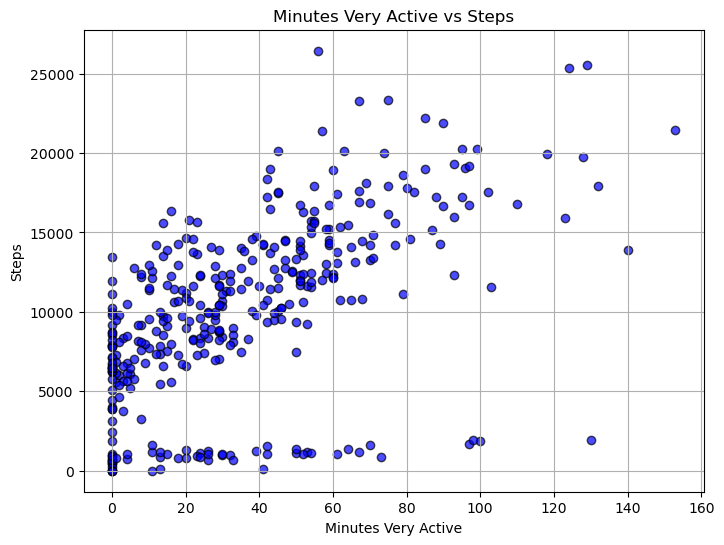

In [63]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(fitbit['Minutes Very Active'], fitbit['Steps'], alpha=0.7, c='blue', edgecolors='k')
plt.title('Minutes Very Active vs Steps')
plt.xlabel('Minutes Very Active')
plt.ylabel('Steps')
plt.grid(True)

# Show the plot
plt.show()


#### What can you say about Minute Very Active and Steps? Write a comment below

In [ ]:
#We can see that there is some correlation but also some of the outliers where minutes very active is not equally growing with number of steps


#### We also suspect that there must be a linear relationship between the Minutes Sedentary and the Steps. Compute the correlation between these variables.

In [64]:
correlation = fitbit['Minutes Sedentary'].corr(fitbit['Steps'])
correlation

0.07690608062990098

#### Use matplotlib to visually plot Minutes Sedentary vs Steps. Based on the results of the computed correlation and the plot. What can you say about these 2 variables?

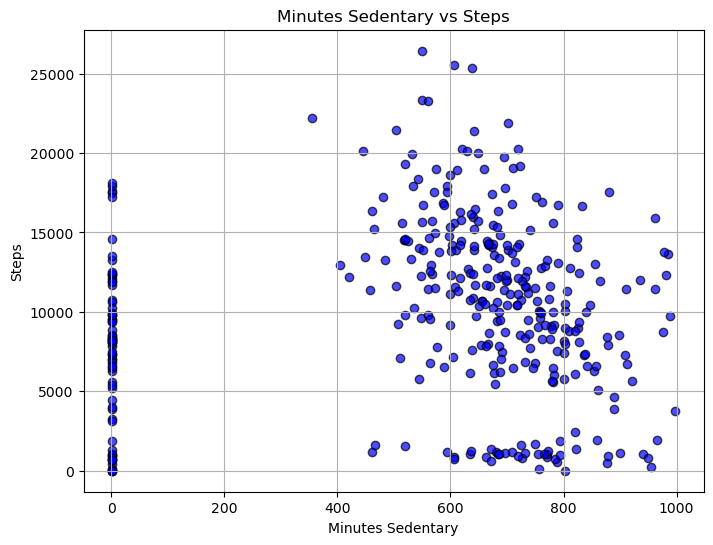

In [65]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(fitbit['Minutes Sedentary'], fitbit['Steps'], alpha=0.7, c='blue', edgecolors='k')
plt.title('Minutes Sedentary vs Steps')
plt.xlabel('Minutes Sedentary')
plt.ylabel('Steps')
plt.grid(True)

# Show the plot
plt.show()

#The calculated correlation was very right, there is not much correlation


#### We also suspect that there must be a linear relationship between the MinutesOfSleep and the Steps. Compute the correlation between these variables.

In [66]:
correlation = fitbit['MinutesOfSleep'].corr(fitbit['Steps'])
correlation


0.1309856595083637

#### Use matplotlib to visually plot MinutesOfSleep vs Steps. Based on the results of the computed correlation and the plot. What can you say about these 2 variables?

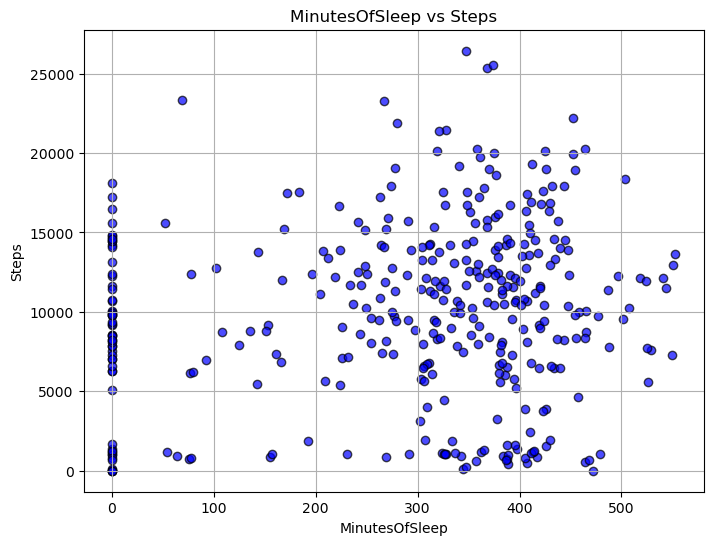

In [67]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(fitbit['MinutesOfSleep'], fitbit['Steps'], alpha=0.7, c='blue', edgecolors='k')
plt.title('MinutesOfSleep vs Steps')
plt.xlabel('MinutesOfSleep')
plt.ylabel('Steps')
plt.grid(True)

# Show the plot
plt.show()

#Also this is not very correlated

#### Select a subset of your dataset with the columns below and compute the correlation matrix. Save the results in the variable `cor_fit`
column= ['Calorie burned', 'Steps','Floors','Minutes Sedentary','Minutes Very Active', 'MinutesOfSleep']

In [74]:
column= ['Calorie burned', 'Steps','Floors','Minutes Sedentary','Minutes Very Active', 'MinutesOfSleep']
cor_fit = fitbit[column]
cor_fit = cor_fit.corr()

#### Based on the result of the correlation matrix. What are the highly correlated features with the variable Steps?
*Hint: From the results above select the variable Steps and order your results in descending order (use Pandas sort_values function)*

In [76]:
cor_fit['Steps'].sort_values(ascending=False)

Steps                  1.000000
Minutes Very Active    0.571452
Floors                 0.306511
Calorie burned         0.255305
MinutesOfSleep         0.130986
Minutes Sedentary      0.076906
Name: Steps, dtype: float64

# Challenge 3

#### Open the `Time_Grades.csv` file and name your dataset `time_grades`.

In [78]:
time_grades = pd.read_csv("C:/Users/Vladimir/Desktop/Ironhack_labs/Week13/lab-pivot-table-correlation/your_code/data/Time_Grades.csv")


In [79]:
time_grades.tail()

,Name,Study time,Grade
10,Gemma,7,8
11,Alicia,11,7
12,Jonathan,2,1
13,Cristina,13,8
14,Pilar,3,2


#### Show visually the frequency distribution of the time_grades dataset.

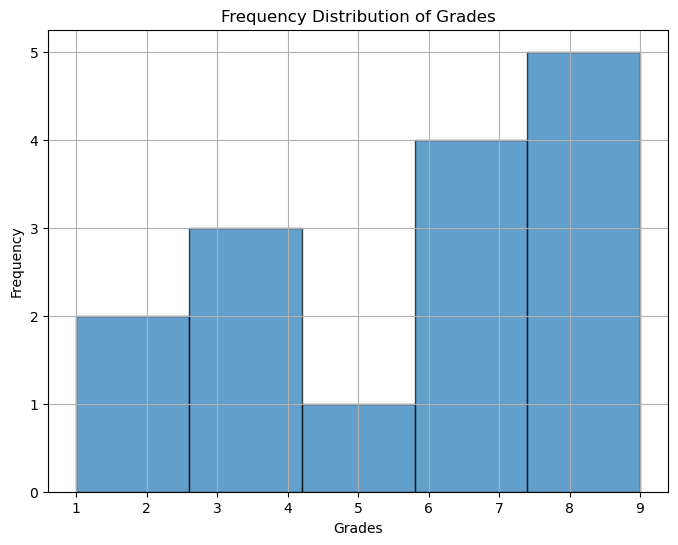

In [90]:
plt.figure(figsize=(8, 6))
plt.hist(time_grades['Grade'], bins=5, edgecolor='k', alpha=0.7)
plt.title('Frequency Distribution of Grades')
plt.xlabel('Grades')
plt.ylabel('Frequency')
plt.grid(True)

# Show the histogram
plt.show()

#### Is there a correlation between study time and Grade? Use both Pearson and Spearman correlation and comment your results.

In [92]:
pearson_corr = time_grades['Study time'].corr(time_grades['Grade'], method='pearson')

spearman_corr = time_grades['Study time'].corr(time_grades['Grade'], method='spearman')

print(pearson_corr)
print(spearman_corr)

0.7980456073578858
0.819658753036942


#### Use matplotlib to visually plot Study time vs Grade. Based on the results of the computed correlation and the plot. What can you say about these 2 variables?

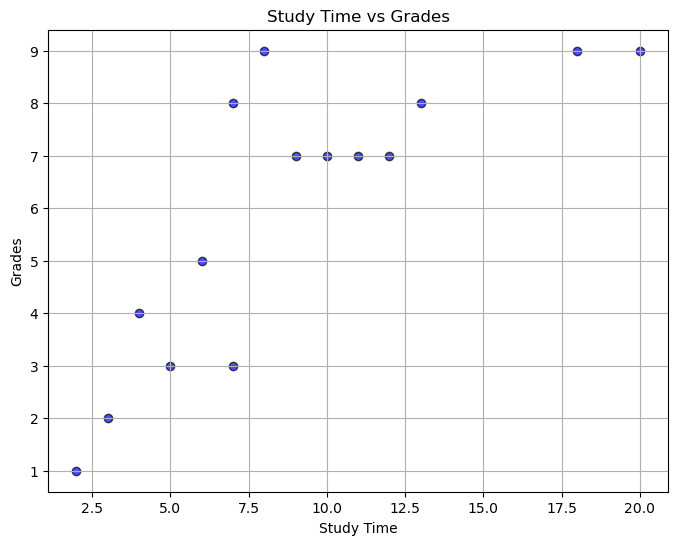

In [95]:
plt.figure(figsize=(8, 6))
plt.scatter(time_grades['Study time'], time_grades['Grade'], alpha=0.7, c='blue', edgecolors='k')
plt.title('Study Time vs Grades')
plt.xlabel('Study Time')
plt.ylabel('Grades')
plt.grid(True)



#We can see that with increasing study time the grade is greater

#### Could you explain the difference between Pearson and Spearman correlation? (see References in README.md) 

In [ ]:
# the main difference from what i found is that Pearson is used for more linear correlation meanwhile Spearman is used when there are non linear correlated 
